In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import pcmdpy as ppy
import pandas as pd
from seaborn import color_palette
%matplotlib inline

In [2]:
from dynesty import utils as dyfunc

In [3]:
from scipy.stats import norm

In [4]:
plt.style.use('cook')

In [5]:
from setup_files.mocks_paper1.mock_models import models, run_names, results as res

In [6]:
max_logls = pd.read_csv('setup_files/mocks_paper1/max_logls.csv', index_col=0)
max_logls.head(10)

,logl_mean,logl_true
run_name,,
mock_1,-983.398,-1057.917
mock_2,-53.607,-73.388
mock_3,-931.613,-953.908
mock_4,-46.549,-424.866
mock_5,-962.418,-1009.488
mock_6,-952.367,-1023.462
mock_7,-981.811,-1262.952
mock_8,-969.699,-1207.784
mock_9,928945.909,928921.060


# Figure 4

In [7]:
r = res['mock_8']
max_logl = max_logls.loc['mock_8'].logl_mean

/n/home01/bcook/dynesty/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
  new_res.logzerr = np.sqrt(np.array(saved_logzvar))


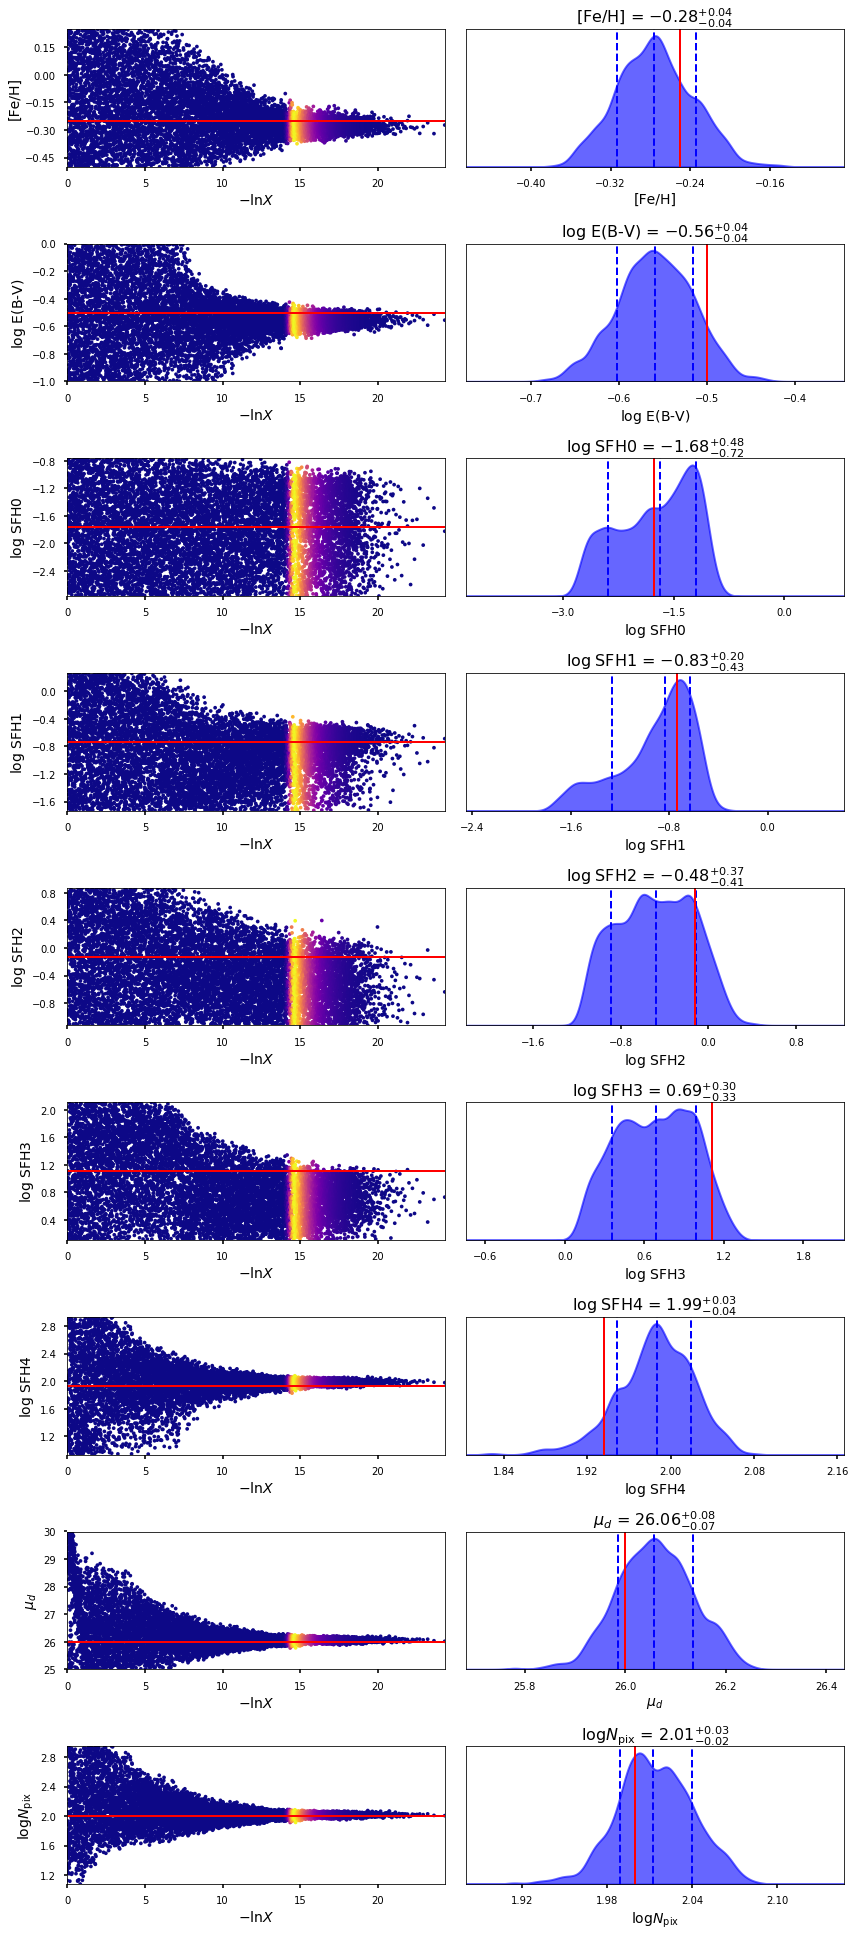

In [8]:
fig, axes = r.plot_trace(max_logl=max_logl);
plt.tight_layout()

/n/home01/bcook/dynesty/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
  new_res.logzerr = np.sqrt(np.array(saved_logzvar))


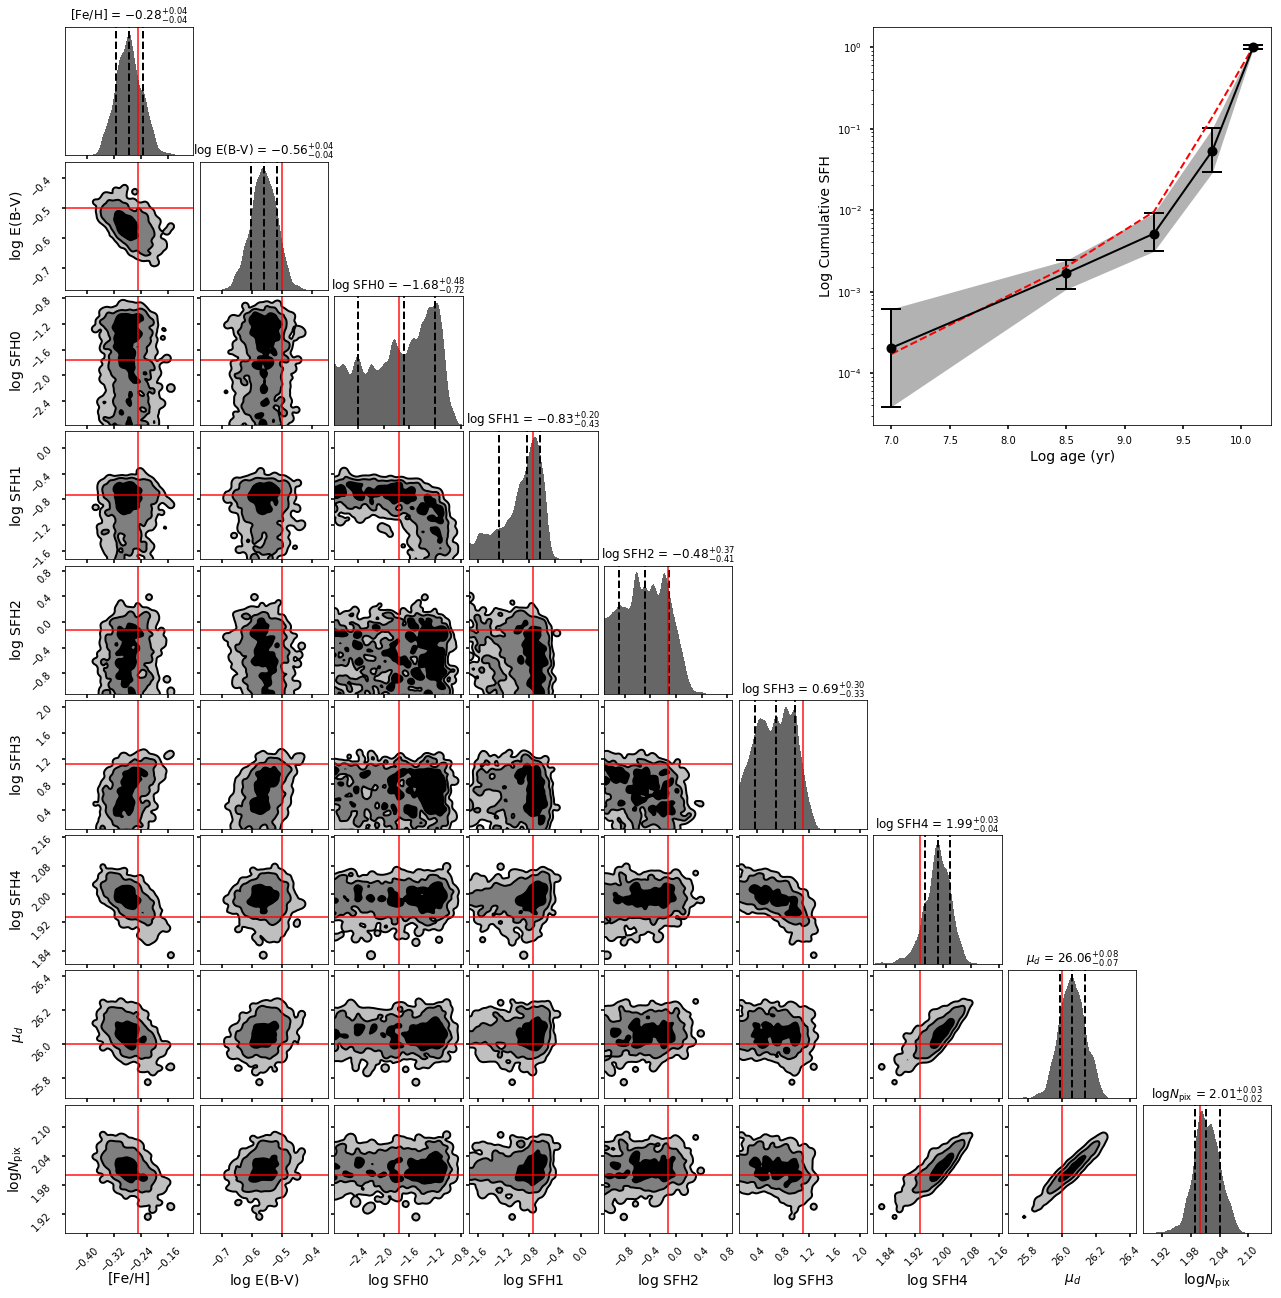

In [9]:
fig, axes = plt.subplots(ncols=9, nrows=9, figsize=(18, 18))
fig, axes = r.plot_corner(max_logl=max_logl, fig=(fig,axes));
for ax in axes.flatten():
    ax.title.set_fontsize(12.)
gs = axes[0,0].get_gridspec()
for i in range(9):
    for j in range(9):
        if j > i:
            axes[i,j].remove()
axbig = fig.add_subplot(gs[:3, 6:])
r.plot_cum_sfh(ax=axbig, max_logl=max_logl, title=False)
plt.savefig('figures/corner_cumsfh.pdf')

/n/home01/bcook/dynesty/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
  new_res.logzerr = np.sqrt(np.array(saved_logzvar))


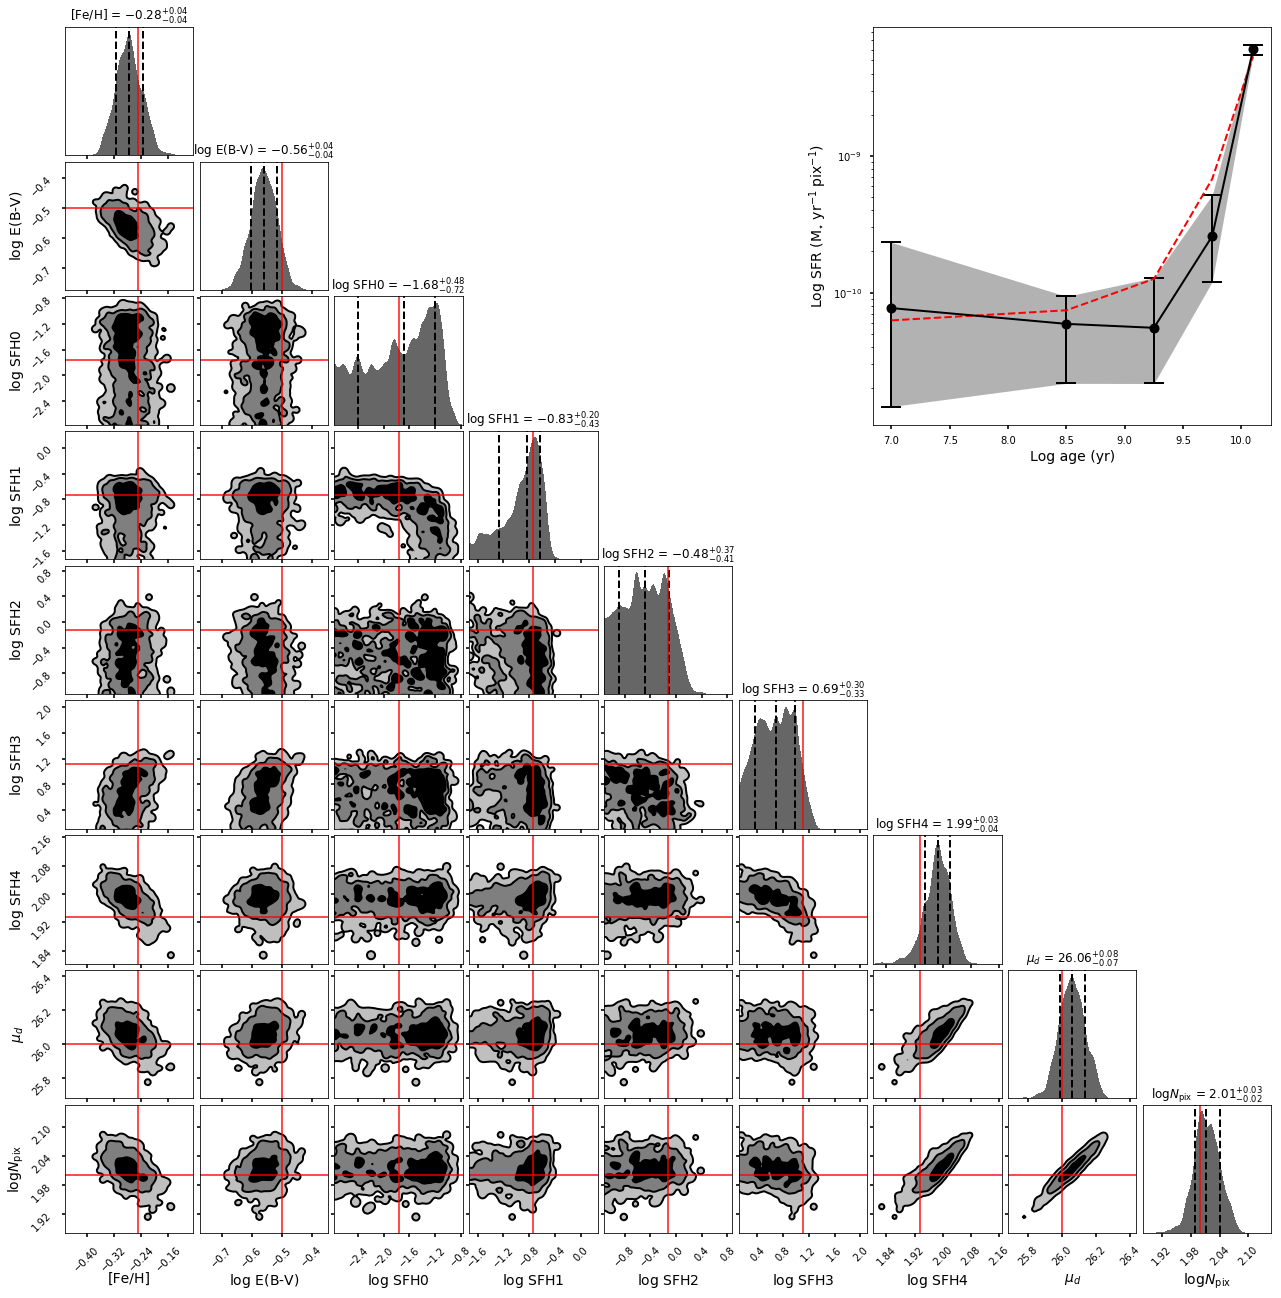

In [10]:
fig, axes = plt.subplots(ncols=9, nrows=9, figsize=(18, 18))
fig, axes = r.plot_corner(max_logl=max_logl, fig=(fig,axes));
for ax in axes.flatten():
    ax.title.set_fontsize(12.)
gs = axes[0,0].get_gridspec()
for i in range(9):
    for j in range(9):
        if j > i:
            axes[i,j].remove()
axbig = fig.add_subplot(gs[:3, 6:])
r.plot_sfr(ax=axbig, max_logl=max_logl, title=False)
plt.savefig('figures/corner_sfr.pdf')

# Figure 5

/n/home01/bcook/dynesty/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
  new_res.logzerr = np.sqrt(np.array(saved_logzvar))


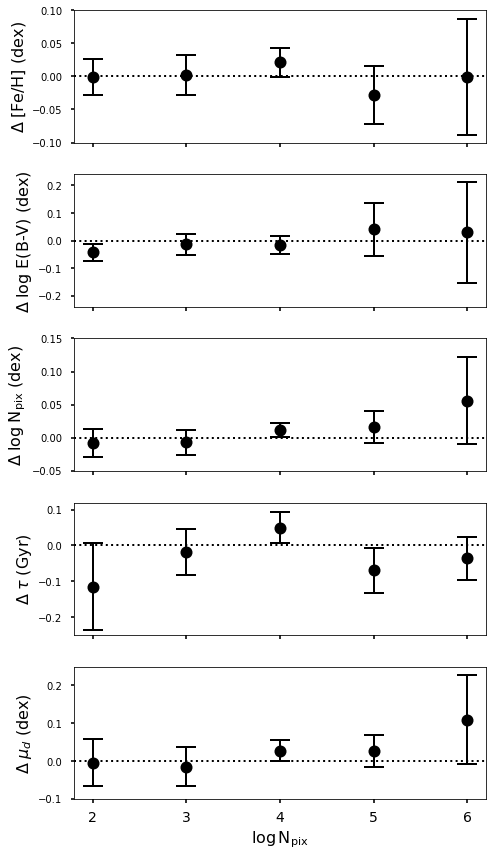

In [44]:
fig, axes = plt.subplots(nrows=5, figsize=(7, 12), sharex=True)
keys = ['mock_5', 'mock_25', 'mock_26', 'mock_27', 'mock_28']
Npixs = np.arange(2, 7)
means = np.array([res[k].means(max_logl=max_logls.loc[k].logl_mean) for k in keys])
stds = np.array([res[k].stds(max_logl=max_logls.loc[k].logl_mean) for k in keys])
truths = np.array([res[k].true_params for k in keys])

for i in range(5):
    ax = axes[i]
    ax.errorbar(Npixs, y=means[:, i]-truths[:, i], yerr=stds[:, i],
                marker='o', ms=10, capsize=10, ls='', color='k')
    ax.axhline(y=0, color='k', ls=':')
    ylabel = r'$\Delta\;$' + res['mock_5'].labels[i]
    if i != 3:
        ylabel += ' (dex)'
    else:
        ylabel += ' (Gyr)'
    ax.set_ylabel(ylabel, fontsize=16)
    
axes[0].set_ylim([-0.1, 0.1])
axes[1].set_ylim([-.24, .24])
axes[2].set_ylim([-.05, .15])
axes[3].set_ylim([-.25, .12])
axes[4].set_ylim([-.1, 0.25])
axes[-1].set_xlabel(r'$\log\,\mathrm{N_{pix}}$', fontsize=16)
axes[-1].set_xticks([2, 3, 4, 5, 6])
axes[-1].set_xticklabels([2, 3, 4, 5, 6], fontsize=14)

plt.tight_layout()
plt.savefig('figures/violin_npix.pdf')

In [100]:
stds

array([[0.04870773, 0.01887453, 0.00416992, 0.14765512],
       [0.02857645, 0.01679791, 0.00435848, 0.22095353]])

# Figure 6 - Variance

/n/home01/bcook/dynesty/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
  new_res.logzerr = np.sqrt(np.array(saved_logzvar))


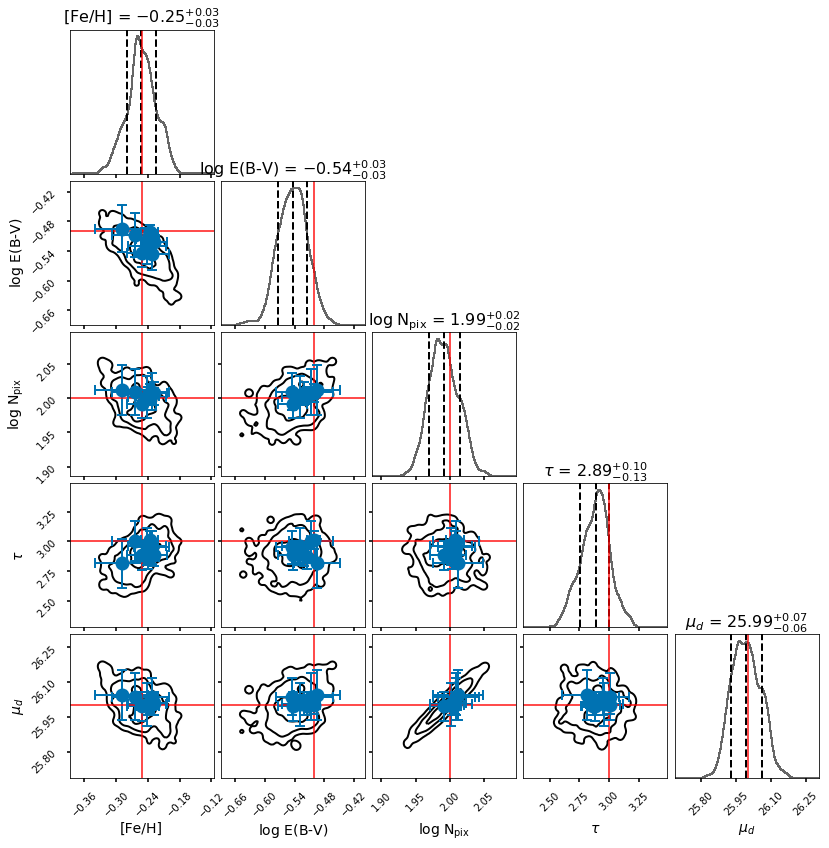

In [60]:
fig, axes = res['mock_5'].plot_corner(max_logl=max_logls.loc['mock_5'].logl_mean, filled=False)
keys = ['mock_5', 'mock_34', 'mock_35', 'mock_36', 'mock_37', 'mock_38', 'mock_39', 'mock_40']
means = np.array([res[k].means(max_logl=max_logls.loc[k].logl_mean) for k in keys])
stds = np.array([res[k].stds(max_logl=max_logls.loc[k].logl_mean) for k in keys])

for i in range(0, 5):
    for j in range(0, i):
            axes[i,j].errorbar(x=means[:, j], y=means[:, i], xerr=stds[:, j], yerr=stds[:, i], marker='o', capsize=5, ls='')

In [74]:
keys = ['mock_5', 'mock_34', 'mock_35', 'mock_36', 'mock_37', 'mock_38', 'mock_39', 'mock_40']
means = np.array([res[k].means(max_logl=max_logls.loc[k].logl_mean) for k in keys])
stds = np.array([res[k].stds(max_logl=max_logls.loc[k].logl_mean) for k in keys])

/n/home01/bcook/dynesty/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
  new_res.logzerr = np.sqrt(np.array(saved_logzvar))


In [81]:
np.std(means, axis=0)

array([0.01873521, 0.01760348, 0.00603556, 0.0656252 , 0.01868848])

In [82]:
np.mean(stds, axis=0)

array([0.03136966, 0.03067333, 0.02397417, 0.13296277, 0.0719129 ])

Text(0, 0.5, '$\\sigma_\\mathrm{best\\,fit}$ / mean uncertainty')

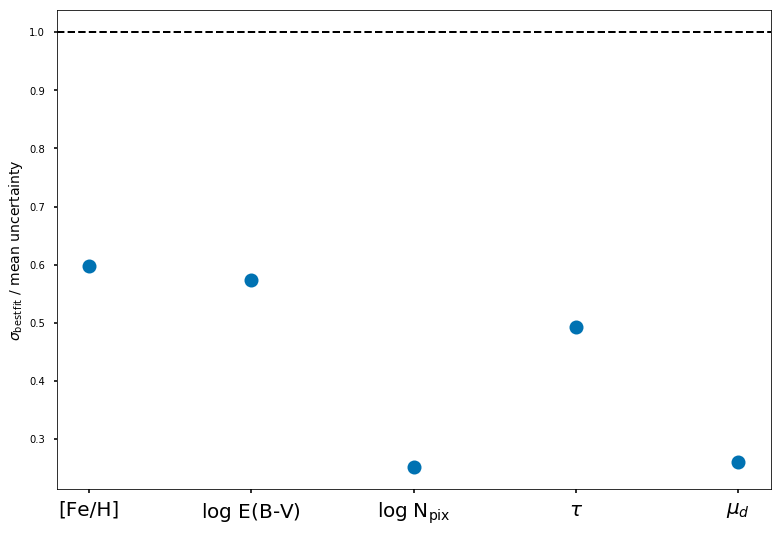

In [80]:
fig, ax = plt.subplots()
ax.plot(np.std(means, axis=0) / np.mean(stds, axis=0), marker='o', ls='')
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(res['mock_5'].labels, fontsize=20)
ax.axhline(y=1, ls='--', color='k')
ax.set_ylabel(r'$\sigma_\mathrm{best\,fit}$ / mean uncertainty')

# Figure 7 - Other Violins

In [87]:
a = axes[0,0]

In [89]:
a.set_frame_on()

In [117]:
means

array([array([-0.23477236, -0.53315868,  1.99619173,  2.93589599]),
       array([-0.25148111, -0.54357963,  1.99186959,  2.88459537, 25.99511977])],
      dtype=object)

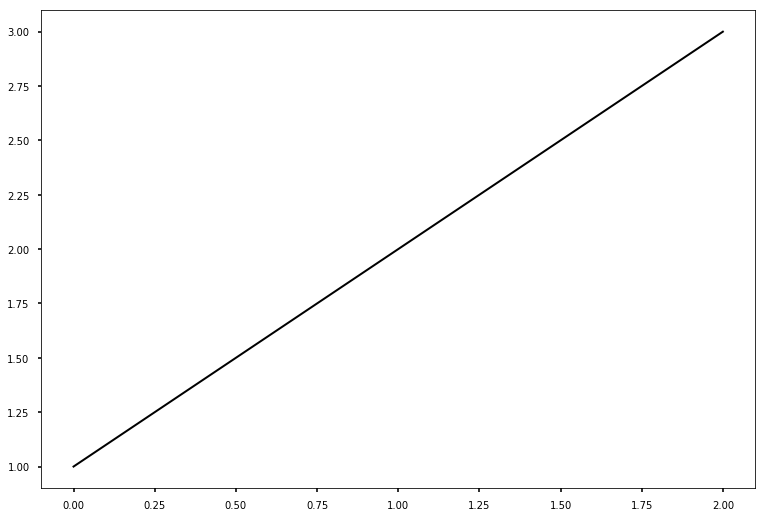

In [125]:
plt.plot([0,  2], [1, 3], 'k-')

/n/home01/bcook/dynesty/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
  new_res.logzerr = np.sqrt(np.array(saved_logzvar))


AttributeError: 'numpy.ndarray' object has no attribute 'append'

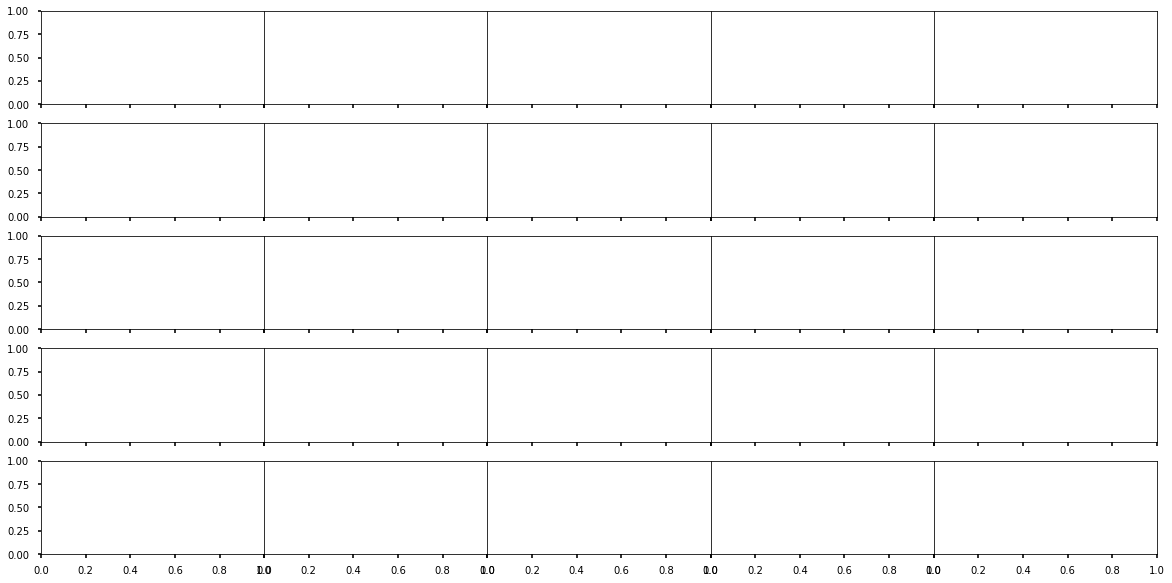

In [120]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 10), sharex='col', sharey='row')
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        a = axes[i,j]
        if j > 0:
#             a.spines['left'].set_visible(False)
            a.yaxis.set_visible(False)
#         if j < axes.shape[1]-1:
#             a.spines['right'].set_visible(False)
plt.subplots_adjust(wspace=0.)

# Distance
keys = ['mock_33', 'mock_5']
means = [res[k].means(max_logl=max_logls.loc[k].logl_mean)-res[k].true_params for k in keys]
means[0].append(None)
stds = [res[k].stds(max_logl=max_logls.loc[k].logl_mean) for k in keys]
stds[0].append(None)
for i in range(5):
    for j in range(len(means)):
        if len(means[j]) >= i+1:
            axes[i, 0].errorbar(x=j, y=means[j][i], yerr=stds[j][i], marker='o', ms=10,
                       ls='', capsize=10, color='k')

# SFH
keys = ['mock_5', 'mock_8']
means = [res['mock_5'].means(max_logl=max_logls.loc['mock_5'].logl_mean)-res['mock_5'].true_params]
means.append([])
stds = np.array([res[k].stds(max_logl=max_logls.loc[k].logl_mean) for k in keys])
for i in range(5):
    for j in range(len(means)):
        if len(means[j]) >= i+1:
            axes[i, 0].errorbar(x=j, y=means[j][i], yerr=stds[j][i], marker='o', ms=10,
                       ls='', capsize=10, color='k')

            
axes[-1, 0].set_xlabel('Distance')
axes[-1, 0].set_xticks([0, 1])
axes[-1, 0].set_xticklabels(['Fixed', 'Free'])
axes[-1, 0].set_xlim([-0.5, 1.5])

axes[-1, 1].set_xlabel('SFH Model')
axes[-1, 1].set_xticks([0, 1])
axes[-1, 1].set_xticklabels([r'$\tau$', 'NonParam'])
axes[-1, 1].set_xlim([-0.5, 1.5])

axes[-1, 2].set_xlabel(r'$\mathrm{N_{im}}$')
axes[-1, 2].set_xticks([0, 1, 2])
axes[-1, 2].set_xticklabels([256, 512, 1024])
axes[-1, 2].set_xlim([-0.5, 2.5])

axes[-1, 3].set_xlabel(r'$\sigma$')
axes[-1, 3].set_xticks([0, 1])
axes[-1, 3].set_xticklabels(['Fixed', 'Free'])
axes[-1, 3].set_xlim([-0.5, 1.5])

axes[-1, 4].set_xlabel('Hess Bins')
axes[-1, 4].set_xticks([0, 1, 2])
axes[-1, 4].set_xticklabels(['Narrow', 'Default', 'Wide'])
axes[-1, 4].set_xlim([-0.5, 2.5])

for ax in axes.flatten():
    ax.axhline(y=0, ls='--', color='k')
for i in range(5):
    axes[i, 0].set_ylabel(res['mock_5'].labels[i])

In [152]:
res['mock_5'].summary_stats.mean

array([-0.24888938, -0.5424546 ,  1.993435  ,  2.91254209, 25.99913878])

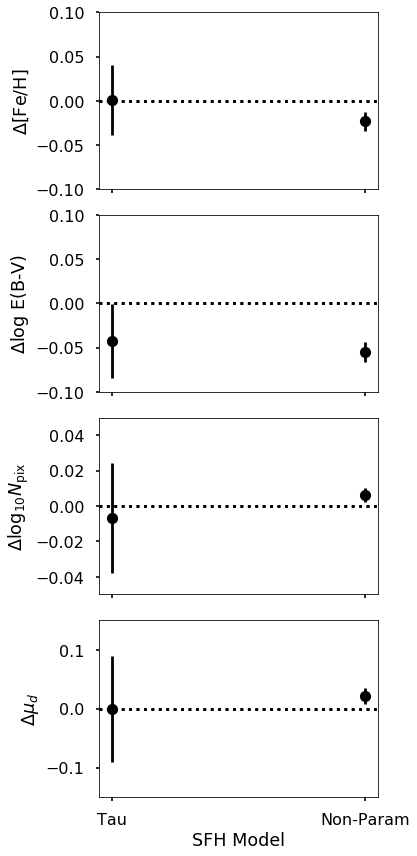

In [153]:
fig, axes = plt.subplots(nrows=4, figsize=(6, 12), sharex=True)
keys = ['mock_5', 'mock_8']
Npixs = [0, 1]
ps = ['logfeh_mean', 'logdust_med', 'logNpix', 'dmod']
for i in range(4):
    ax = axes[i]
    p = ps[i]
    for N, k in zip(Npixs, keys):
        results = res[k]
        idx = results.params.index(p)
        ax.errorbar(N, results.summary_stats.mean[idx]-results.true_params[idx], 2.*results.summary_stats.std[idx], marker='o', color='k')
        ax.axhline(y=0, color='k', ls=':')
        ax.set_ylabel(r'$\Delta$' + results.labels[idx])
#     x_ = res['mock_1'].df[res['mock_1'].params].values[:,i]
#     ax.set_ylim([x_.min(), x_.max()])
    
axes[0].set_ylim([-0.1, 0.1])
axes[1].set_ylim([-0.1, 0.1])
axes[2].set_ylim([-0.05, 0.05])
axes[3].set_ylim([-0.15, 0.15])
axes[-1].set_xticks([0, 1])
axes[-1].set_xticklabels(['Tau', 'Non-Param'])
axes[-1].set_xlabel('SFH Model')
plt.tight_layout()

# Figure 7

In [29]:
colors = sns.color_palette('colorblind', 10).as_hex()

/n/home01/bcook/dynesty/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
  new_res.logzerr = np.sqrt(np.array(saved_logzvar))


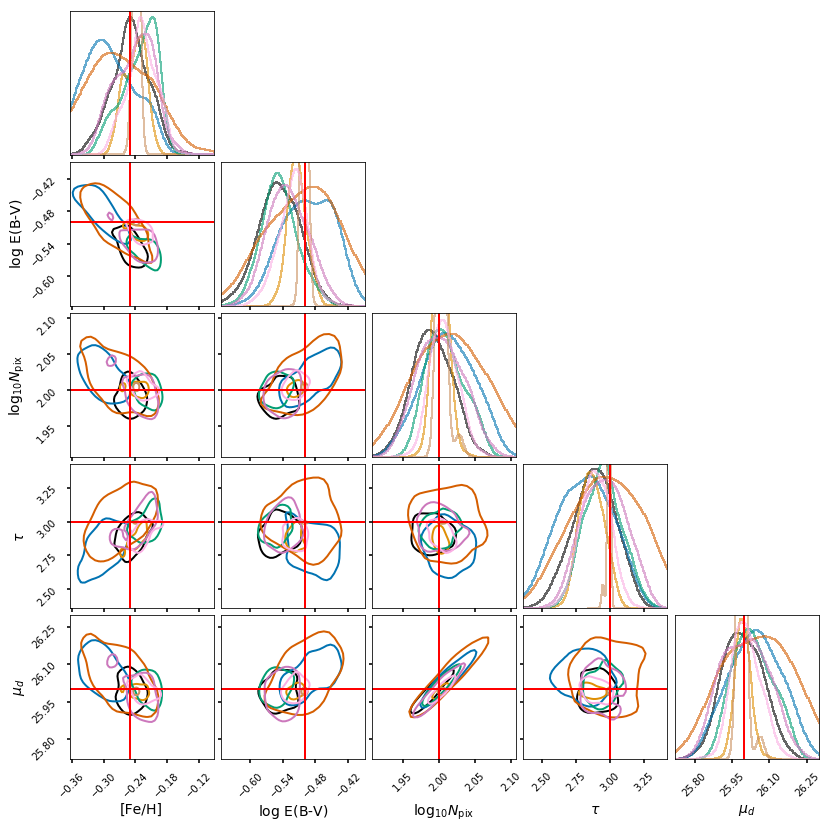

In [34]:
r = res['mock_5']
fig = r.plot_corner(max_logl=max_logls.loc['mock_5'].logl_mean, filled=False, sig_levels=[1], show_titles=False, quantiles=[], smooth=0.03)
for i, d in enumerate(range(34, 41)):
    k = 'mock_{:d}'.format(d)
    r = res[k]
    c = colors[i]
    r.plot_corner(max_logl=max_logls.loc[k].logl_mean, filled=False, sig_levels=[1], color=c, show_titles=False, fig=fig, quantiles=[], smooth=0.03)

/n/home01/bcook/dynesty/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
  new_res.logzerr = np.sqrt(np.array(saved_logzvar))


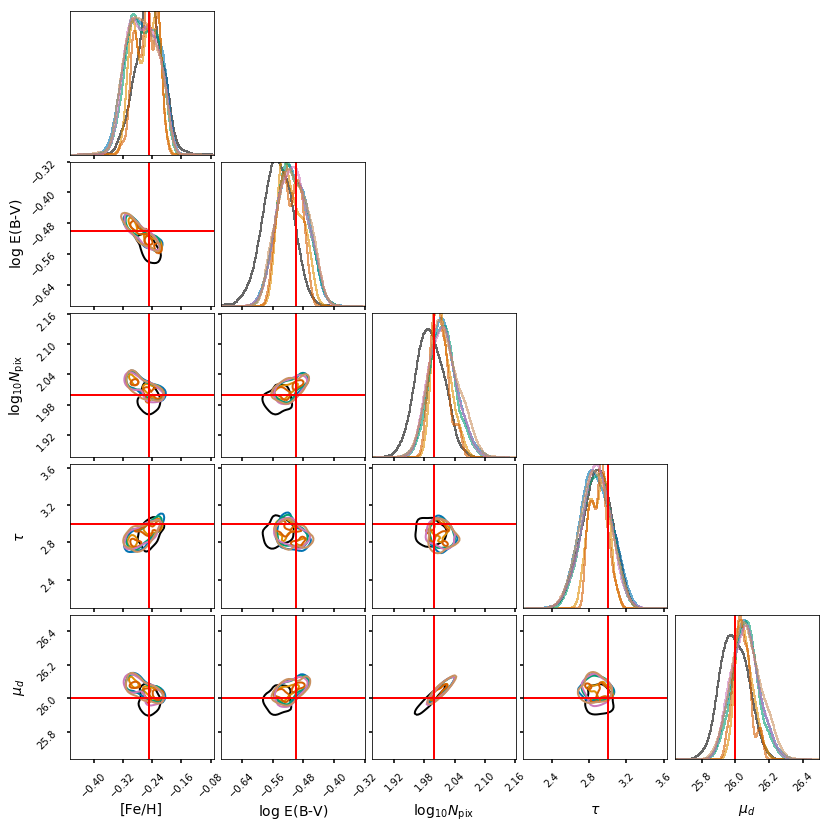

In [35]:
r = res['mock_5']
fig = r.plot_corner(max_logl=max_logls.loc['mock_5'].logl_mean, filled=False, sig_levels=[1], show_titles=False, quantiles=[], smooth=0.03)
for i, d in enumerate(range(18, 24)):
    k = 'mock_{:d}'.format(d)
    r = res[k]
    c = colors[i]
    r.plot_corner(max_logl=max_logls.loc[k].logl_mean, filled=False, sig_levels=[1], color=c, show_titles=False, fig=fig, quantiles=[], smooth=0.03)